In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import os
from scipy.stats import skew, kurtosis, normaltest
import re
from collections import Counter
from bidi.algorithm import get_display
import arabic_reshaper

In [3]:
df = pd.read_excel("../data/ER_data.xlsx")

# --- Remove duplicated empty columns (those ending with .1) ---
df = df[[c for c in df.columns if not c.endswith(".1")]]

# --- Recompute the ERQ / RRS columns after cleaning ---
erq_cols = [c for c in df.columns if c.startswith("ERQ_")]
rrs_cols = [c for c in df.columns if c.startswith("RRS_")]
text_cols = ["EER_text"]

print("ERQ columns:", erq_cols)
print("RRS columns:", rrs_cols)

base_cols = [
    "ID",
    "ResponseId",
    "age",
    "child_age",
    "sex",
    "n_children",
    "child_gender",
    "residence",
    "LocationLatitude",
    "LocationLongitude",
]



selected_cols = base_cols + text_cols + erq_cols + rrs_cols

main_df = df[selected_cols].copy()

print("Before drop Nan values ",len(main_df))

main_df.dropna(subset=erq_cols + rrs_cols + text_cols, inplace=True)

print("After drop Nan values ",len(main_df))

main_df["ERQ_mean"] = main_df[erq_cols].mean(axis=1).round(3)
main_df["RRS_mean"] = main_df[rrs_cols].mean(axis=1).round(3)

print(main_df.info())
print(main_df[["ERQ_mean", "RRS_mean"]].describe())

main_df.to_csv("ER_data_selected.csv", index=False)

ERQ columns: ['ERQ_1', 'ERQ_2', 'ERQ_3', 'ERQ_4', 'ERQ_5', 'ERQ_6', 'ERQ_7', 'ERQ_8', 'ERQ_9', 'ERQ_10']
RRS columns: ['RRS_1', 'RRS_2', 'RRS_3', 'RRS_4', 'RRS_5']
Before drop Nan values  659
After drop Nan values  397
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 0 to 656
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 397 non-null    object 
 1   ResponseId         397 non-null    object 
 2   age                397 non-null    int64  
 3   child_age          397 non-null    float64
 4   sex                397 non-null    int64  
 5   n_children         397 non-null    float64
 6   child_gender       396 non-null    float64
 7   residence          397 non-null    object 
 8   LocationLatitude   75 non-null     float64
 9   LocationLongitude  75 non-null     float64
 10  EER_text           397 non-null    object 
 11  ERQ_1              397 non-null    float64
 12  ERQ_

         ERQ_mean    RRS_mean
count  397.000000  397.000000
mean     4.191688    2.092191
std      0.891490    0.696067
min      1.000000    1.000000
25%      3.700000    1.600000
50%      4.200000    2.000000
75%      4.700000    2.400000
max      7.000000    4.000000

Correlation between ERQ and RRS
          ERQ_mean  RRS_mean
ERQ_mean  1.000000 -0.007226
RRS_mean -0.007226  1.000000


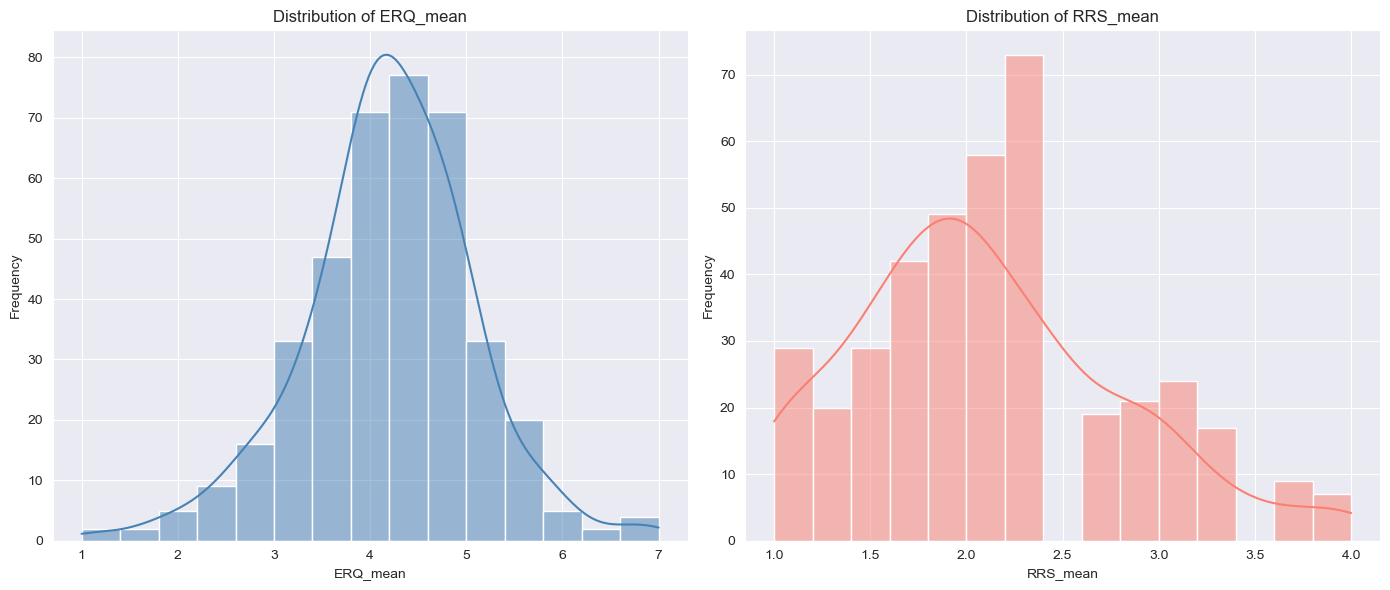

===== ERQ_mean Distribution =====
Skewness: -0.2
Kurtosis: 1.113
Normality test p-value: 0.0012

===== RRS_mean Distribution =====
Skewness: 0.582
Kurtosis: -0.001
Normality test p-value: 0.0000


In [4]:
plt.figure(figsize=(14, 6))

#histogram
# main_df["ERQ_mean"].hist(bins=20)
# main_df["RRS_mean"].hist(bins=20)

print(main_df[["ERQ_mean","RRS_mean"]].describe())
print("\nCorrelation between ERQ and RRS")
print(main_df[["ERQ_mean","RRS_mean"]].corr())
# Histogram for ERQ_mean
plt.subplot(1, 2, 1)
sns.histplot(main_df["ERQ_mean"], bins=15, kde=True, color="steelblue")
plt.title("Distribution of ERQ_mean")
plt.xlabel("ERQ_mean")
plt.ylabel("Frequency")

# Histogram for RRS_mean
plt.subplot(1, 2, 2)
sns.histplot(main_df["RRS_mean"], bins=15, kde=True, color="salmon")
plt.title("Distribution of RRS_mean")
plt.xlabel("RRS_mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

print("===== ERQ_mean Distribution =====")
print("Skewness:", round(skew(main_df["ERQ_mean"].dropna()), 3))
print("Kurtosis:", round(kurtosis(main_df["ERQ_mean"].dropna()), 3))

# Normality test (D'Agostino K^2)
stat, p = normaltest(main_df["ERQ_mean"].dropna())
print(f"Normality test p-value: {p:.4f}")

print("\n===== RRS_mean Distribution =====")
print("Skewness:", round(skew(main_df["RRS_mean"].dropna()), 3))
print("Kurtosis:", round(kurtosis(main_df["RRS_mean"].dropna()), 3))

stat, p = normaltest(main_df["RRS_mean"].dropna())
print(f"Normality test p-value: {p:.4f}")

In [5]:
# ========= 5. Keep only EER_text =========
main_df["text"] = main_df[text_cols[0]].fillna("").astype(str)

# ========= 6. Remove empty text (less than 5 chars) =========
main_df = main_df[main_df["text"].str.len() > 5].copy()
print("Rows after removing empty text:", len(main_df))

eer_df = main_df[["ID", "text"]]

print(eer_df.info())
print(eer_df.head())
print(eer_df.info())
print(eer_df.head())

Rows after removing empty text: 397
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 0 to 656
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      397 non-null    object
 1   text    397 non-null    object
dtypes: object(2)
memory usage: 9.3+ KB
None
      ID                                               text
0  30840  אני רוצה להאמין שהחטופים יחזרו אלינו, ולהזכיר ...
1  82080  אפשר להתנחם בכך שהיא נרגעה לאחר מכן ובתום השבע...
2  75872  עשית החלטה נכונה מתוך שיקול הדעת בשביל לחסוך ל...
3  14062  את עושה מה שאת יכולה , את צריכה גם לנשום , מקס...
4  80133  אני בן אדם ולא מכונה . פחד משתק וגורם לצאת משל...
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 0 to 656
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      397 non-null    object
 1   text    397 non-null    object
dtypes: object(2)
memory usage: 9.3+ KB
None
      ID                    

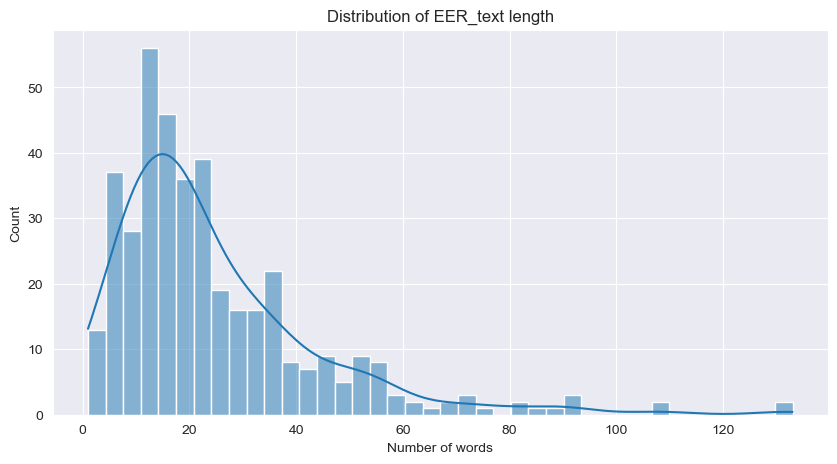

Mean length: 24.770780856423173
Median length: 19.0
Skew: 2.1044270905587075
Kurtosis: 6.145384761244969


,ID,text,text_length
0,30840,"אני רוצה להאמין שהחטופים יחזרו אלינו, ולהזכיר ...",19
1,82080,אפשר להתנחם בכך שהיא נרגעה לאחר מכן ובתום השבע...,14
2,75872,עשית החלטה נכונה מתוך שיקול הדעת בשביל לחסוך ל...,12
3,14062,"את עושה מה שאת יכולה , את צריכה גם לנשום , מקס...",15
4,80133,אני בן אדם ולא מכונה . פחד משתק וגורם לצאת משל...,12


In [6]:
# Add text length
# Make a real copy to avoid SettingWithCopyWarning
eer_df = main_df[["ID", "text"]].copy()

# Add text length safely with .loc
eer_df.loc[:, "text_length"] = eer_df["text"].str.split().str.len()

plt.figure(figsize=(10,5))
sns.histplot(eer_df["text_length"], bins=40, kde=True)
plt.title("Distribution of EER_text length")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.show()

print("Mean length:", eer_df["text_length"].mean())
print("Median length:", eer_df["text_length"].median())
print("Skew:", skew(eer_df["text_length"]))
print("Kurtosis:", kurtosis(eer_df["text_length"]))
eer_df.head()

In [7]:
def clean_text(t):
    t = t.lower()
    t = re.sub(r"[^\w\s]", "", t)  # remove punctuation
    t = re.sub(r"\s+", " ", t).strip()
    return t

eer_df["clean_text"] = eer_df["text"].apply(clean_text)
eer_df.head()

,ID,text,text_length,clean_text
0,30840,"אני רוצה להאמין שהחטופים יחזרו אלינו, ולהזכיר ...",19,אני רוצה להאמין שהחטופים יחזרו אלינו ולהזכיר ל...
1,82080,אפשר להתנחם בכך שהיא נרגעה לאחר מכן ובתום השבע...,14,אפשר להתנחם בכך שהיא נרגעה לאחר מכן ובתום השבע...
2,75872,עשית החלטה נכונה מתוך שיקול הדעת בשביל לחסוך ל...,12,עשית החלטה נכונה מתוך שיקול הדעת בשביל לחסוך ל...
3,14062,"את עושה מה שאת יכולה , את צריכה גם לנשום , מקס...",15,את עושה מה שאת יכולה את צריכה גם לנשום מקסימום...
4,80133,אני בן אדם ולא מכונה . פחד משתק וגורם לצאת משל...,12,אני בן אדם ולא מכונה פחד משתק וגורם לצאת משליט...


In [8]:
all_words = []
for text in eer_df["clean_text"]:
    all_words.extend(text.split())

word_counts = Counter(all_words)
top_words = word_counts.most_common(30)
top_words

[('את', 338),
 ('לא', 185),
 ('זה', 166),
 ('אני', 139),
 ('על', 110),
 ('מה', 88),
 ('גם', 77),
 ('טוב', 74),
 ('כל', 72),
 ('עם', 71),
 ('יותר', 68),
 ('לך', 65),
 ('להיות', 60),
 ('שלי', 60),
 ('הילדים', 59),
 ('בסדר', 58),
 ('של', 55),
 ('שלך', 51),
 ('הכל', 51),
 ('שאת', 50),
 ('יכולה', 46),
 ('יש', 44),
 ('לי', 42),
 ('אבל', 41),
 ('קשה', 40),
 ('הכי', 40),
 ('עושה', 39),
 ('הוא', 38),
 ('המצב', 36),
 ('אמא', 35)]

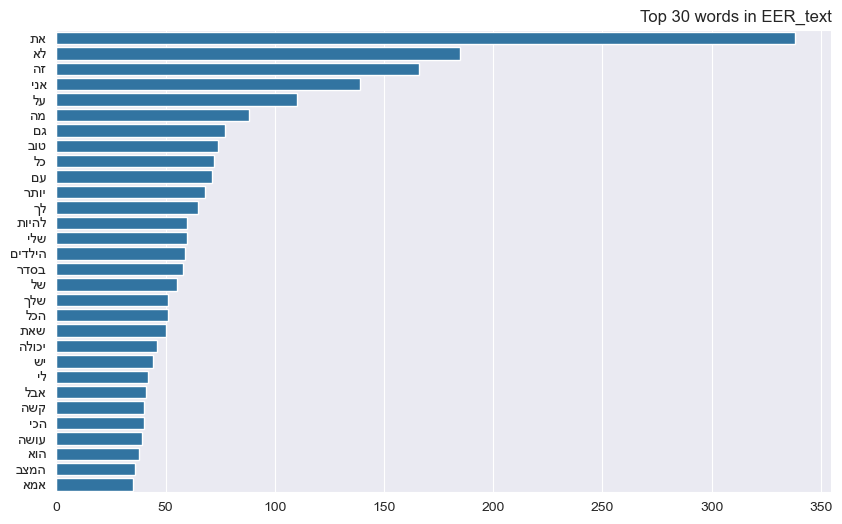

In [9]:
words, counts = zip(*top_words)

# reshape + bidi
reshaped_words = [arabic_reshaper.reshape(w) for w in words]
bidi_words = [get_display(w) for w in reshaped_words]

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=bidi_words)
plt.title("Top 30 words in EER_text", loc='right')
plt.show()

Median RRS =  2.0
RRS_bin
High    228
Low     169
Name: count, dtype: int64


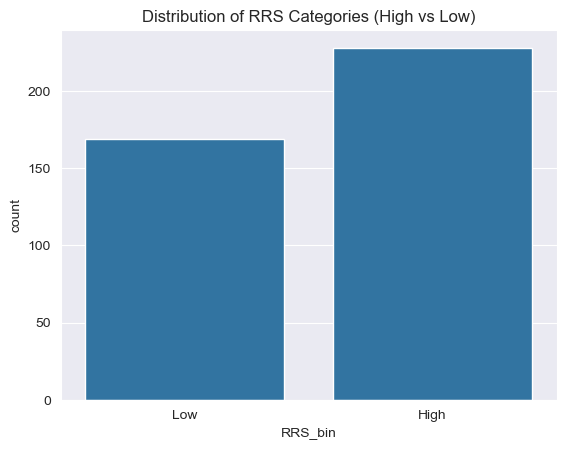

In [10]:


median_rrs = main_df["RRS_mean"].median()
main_df["RRS_bin"] = np.where(
    main_df["RRS_mean"] >= median_rrs, "High", "Low"
)
print("Median RRS = ",median_rrs)
print(main_df["RRS_bin"].value_counts())
sns.countplot(data=main_df, x="RRS_bin")
plt.title("Distribution of RRS Categories (High vs Low)")
plt.show()

Median ERQ =  2.0
ERQ_bin
High    212
Low     185
Name: count, dtype: int64


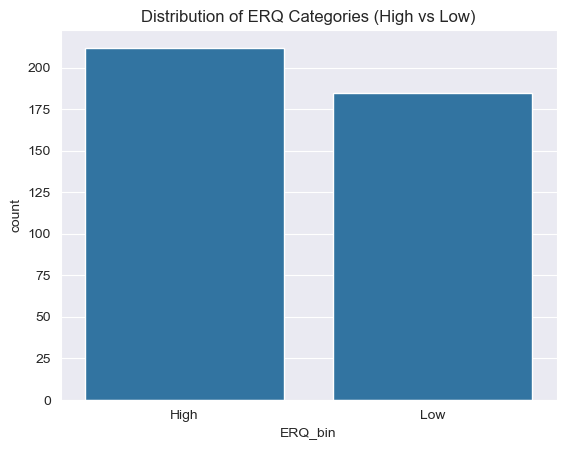

In [11]:
median_erq = main_df["ERQ_mean"].median()
main_df["ERQ_bin"] = np.where(
    main_df["ERQ_mean"] >= median_erq, "High", "Low"
)

print("Median ERQ = ",median_rrs)
print(main_df["ERQ_bin"].value_counts())
sns.countplot(data=main_df, x="ERQ_bin")
plt.title("Distribution of ERQ Categories (High vs Low)")
plt.show()

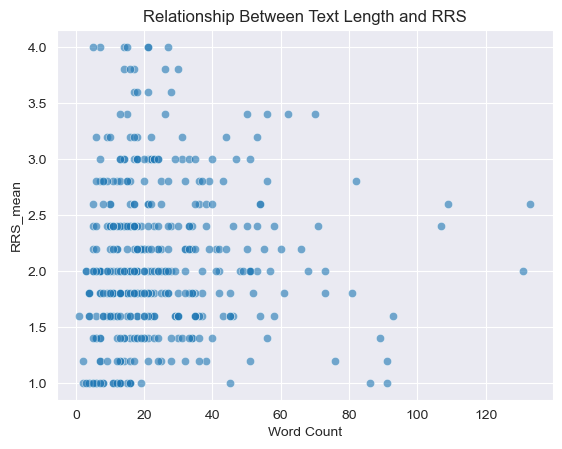

In [12]:
main_df["word_count"] = main_df["text"].astype(str).apply(lambda x: len(x.split()))
sns.scatterplot(
    data=main_df,
    x="word_count",
    y="RRS_mean",
    alpha=0.6
)
plt.title("Relationship Between Text Length and RRS")
plt.xlabel("Word Count")
plt.ylabel("RRS_mean")
plt.show()

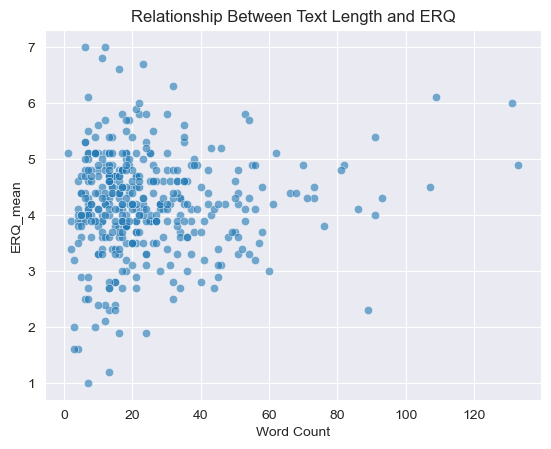

In [13]:
sns.scatterplot(
    data=main_df,
    x="word_count",
    y="ERQ_mean",
    alpha=0.6
)
plt.title("Relationship Between Text Length and ERQ")
plt.xlabel("Word Count")
plt.ylabel("ERQ_mean")
plt.show()

In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "avichr/heBERT_sentiment_analysis"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True
)

Device set to use mps:0
/opt/anaconda3/envs/cs224n/lib/python3.12/site-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [15]:
example_text = "הרגשתי פחד ולחץ גדול בזמן האירוע, לא הצלחתי להירגע."
sentiment_pipeline(example_text)

[[{'label': 'neutral', 'score': 0.2506873905658722},
  {'label': 'positive', 'score': 0.24945200979709625},
  {'label': 'negative', 'score': 0.499860554933548}]]

In [16]:
def get_hebert_scores(text):
    # Handle missing text
    if not isinstance(text, str) or text.strip() == "":
        return pd.Series([None, None, None],
                         index=["hebert_neg", "hebert_neu", "hebert_pos"])

    result = sentiment_pipeline(text)[0]   # list of dicts

    # Convert list → dict: {"negative": 0.xx, "neutral": 0.xx, "positive": 0.xx}
    score_dict = {d["label"].lower(): d["score"] for d in result}

    return pd.Series(
        [
            score_dict.get("negative", None),
            score_dict.get("neutral", None),
            score_dict.get("positive", None),
        ],
        index=["hebert_neg", "hebert_neu", "hebert_pos"]
    )

In [23]:
scores = main_df["text"].apply(get_hebert_scores)
main_df = pd.concat([main_df, scores], axis=1)

In [24]:
main_df[["text","hebert_neg","hebert_pos","hebert_neu"]]

,text,hebert_neg,hebert_neg,hebert_pos,hebert_pos,hebert_neu,hebert_neu
0,"אני רוצה להאמין שהחטופים יחזרו אלינו, ולהזכיר ...",0.009500,0.009500,0.989980,0.989980,0.000519,0.000519
1,אפשר להתנחם בכך שהיא נרגעה לאחר מכן ובתום השבע...,0.981646,0.981646,0.017662,0.017662,0.000692,0.000692
2,עשית החלטה נכונה מתוך שיקול הדעת בשביל לחסוך ל...,0.707550,0.707550,0.290448,0.290448,0.002002,0.002002
3,"את עושה מה שאת יכולה , את צריכה גם לנשום , מקס...",0.999877,0.999877,0.000062,0.000062,0.000061,0.000061
4,אני בן אדם ולא מכונה . פחד משתק וגורם לצאת משל...,0.999824,0.999824,0.000069,0.000069,0.000106,0.000106
...,...,...,...,...,...,...,...
637,אני יכולה להפסיק לראות את הסרטונים ואז יהיה לי...,0.999581,0.999581,0.000069,0.000069,0.000349,0.000349
645,אני לא יודע איך לבטא,0.222289,0.222289,0.001815,0.001815,0.775896,0.775896
652,קשה לנחם את הסיצואציה בא אנו חיים.\nעושה לי טו...,0.999886,0.999886,0.000066,0.000066,0.000048,0.000048
655,יכל להיות שאם זה לא יעבור בימים הקרובים תלך למ...,0.999871,0.999871,0.000045,0.000045,0.000084,0.000084


In [25]:
main_df.head()

,ID,ResponseId,age,child_age,sex,n_children,child_gender,residence,LocationLatitude,LocationLongitude,...,text,RRS_bin,ERQ_bin,word_count,hebert_neg,hebert_neu,hebert_pos,hebert_neg,hebert_neu,hebert_pos
0,30840,R_2zx6JDdyuRWIFe7,29,5.0,2,1.0,NaN,באר שבע,31.5000,34.7500,...,"אני רוצה להאמין שהחטופים יחזרו אלינו, ולהזכיר ...",Low,High,19,0.009500,0.000519,0.989980,0.009500,0.000519,0.989980
1,82080,R_87VewwKW25MdOWR,37,10.0,2,3.0,1.0,חיפה,32.0803,34.7805,...,אפשר להתנחם בכך שהיא נרגעה לאחר מכן ובתום השבע...,High,High,14,0.981646,0.000692,0.017662,0.981646,0.000692,0.017662
2,75872,R_2UXkBlYFVZKykUc,39,0.0,1,1.0,2.0,"כפר הרא""ה",31.5000,34.7500,...,עשית החלטה נכונה מתוך שיקול הדעת בשביל לחסוך ל...,High,High,12,0.707550,0.002002,0.290448,0.707550,0.002002,0.290448
3,14062,R_3NJoeQvJTS5YS4s,47,9.0,2,2.0,1.0,אשדוד,32.0803,34.7805,...,"את עושה מה שאת יכולה , את צריכה גם לנשום , מקס...",High,Low,15,0.999877,0.000061,0.000062,0.999877,0.000061,0.000062
4,80133,R_2wHVGst8nWwQV1c,34,6.0,2,3.0,1.0,יבנה,31.5000,34.7500,...,אני בן אדם ולא מכונה . פחד משתק וגורם לצאת משל...,Low,High,12,0.999824,0.000106,0.000069,0.999824,0.000106,0.000069


In [20]:
main_df.shape

(397, 35)

In [27]:
# ============================================
# 1. Identify questions and HeBERT scores
# ============================================
erq_cols = [c for c in main_df.columns if c.startswith("ERQ_")]
rrs_cols = [c for c in main_df.columns if c.startswith("RRS_") and c[-1].isdigit()]

hebert_cols = ["hebert_neg", "hebert_neu", "hebert_pos"]

all_question_cols = erq_cols + rrs_cols


# ============================================
# 2. SAFE correlation computation
# ============================================
results = []

for q in all_question_cols:
    for h in hebert_cols:
        # extract ONLY the numeric columns and drop NaNs
        sub = main_df[[q, h]].apply(pd.to_numeric, errors='coerce').dropna()

        if len(sub) > 2:
            corr = sub.corr().iloc[0, 1]
        else:
            corr = np.nan

        results.append({
            "question": q,
            "hebert_score": h,
            "correlation": corr
        })

corr_df = pd.DataFrame(results)

# Sort by absolute correlation
corr_df = corr_df.sort_values(by="correlation", key=lambda x: x.abs(), ascending=False)

corr_df.reset_index(drop=True, inplace=True)

corr_df

,question,hebert_score,correlation
0,RRS_5,hebert_pos,-0.146313
1,RRS_5,hebert_neg,0.143905
2,RRS_3,hebert_neg,0.137145
3,RRS_1,hebert_neg,0.126855
4,ERQ_3,hebert_neu,-0.123059
5,RRS_3,hebert_pos,-0.117052
6,RRS_1,hebert_neu,-0.105784
7,ERQ_1,hebert_neu,-0.105427
8,RRS_1,hebert_pos,-0.094789
9,RRS_4,hebert_neg,0.091822


In [28]:
corr_df.head()

,question,hebert_score,correlation
0,RRS_5,hebert_pos,-0.146313
1,RRS_5,hebert_neg,0.143905
2,RRS_3,hebert_neg,0.137145
3,RRS_1,hebert_neg,0.126855
4,ERQ_3,hebert_neu,-0.123059
